In [1]:
import sqlite3
import pandas as pd
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt

In [4]:
conn = sqlite3.connect('../tosql/test.db')

df = pd.read_sql_query('SELECT * FROM tasks', conn)

In [5]:
len(df)

243

In [7]:
df.tail()

,d,start,end,name,total,hours,minutes,note
238,06/28/2020,14:16,15:08,code,3168,0,52,cp
239,06/28/2020,18:34,18:59,code,1500,0,25,cp
240,06/29/2020,12:34,14:37,code,7359,2,2,cp
241,06/29/2020,20:45,21:35,code,2995,0,49,HackerRank
242,06/30/2020,10:45,16:05,code,19194,5,19,HackerRank


In [8]:
# add column with total hours
df['total_hours'] = (df['total'] / 3600).round(2)
df.tail()

,d,start,end,name,total,hours,minutes,note,total_hours
238,06/28/2020,14:16,15:08,code,3168,0,52,cp,0.88
239,06/28/2020,18:34,18:59,code,1500,0,25,cp,0.42
240,06/29/2020,12:34,14:37,code,7359,2,2,cp,2.04
241,06/29/2020,20:45,21:35,code,2995,0,49,HackerRank,0.83
242,06/30/2020,10:45,16:05,code,19194,5,19,HackerRank,5.33


In [9]:
# change d to datetime
df['d'] = pd.to_datetime(df.d)
df.tail()

,d,start,end,name,total,hours,minutes,note,total_hours
238,2020-06-28,14:16,15:08,code,3168,0,52,cp,0.88
239,2020-06-28,18:34,18:59,code,1500,0,25,cp,0.42
240,2020-06-29,12:34,14:37,code,7359,2,2,cp,2.04
241,2020-06-29,20:45,21:35,code,2995,0,49,HackerRank,0.83
242,2020-06-30,10:45,16:05,code,19194,5,19,HackerRank,5.33


In [10]:
df.sort_values(by='d')

,d,start,end,name,total,hours,minutes,note,total_hours
0,2019-12-23,23:06,23:07,code,8,0,0,did some coding!,0.00
1,2019-12-24,08:37,08:55,read,1096,0,18,,0.30
2,2019-12-24,12:52,13:47,code,3325,0,55,bathroom break,0.92
3,2019-12-24,13:55,14:30,code,2129,0,35,break,0.59
4,2019-12-24,14:41,16:16,code,5709,1,35,,1.59
...,...,...,...,...,...,...,...,...,...
236,2020-06-28,12:10,12:57,code,2859,0,47,HackerRank,0.79
239,2020-06-28,18:34,18:59,code,1500,0,25,cp,0.42
241,2020-06-29,20:45,21:35,code,2995,0,49,HackerRank,0.83
240,2020-06-29,12:34,14:37,code,7359,2,2,cp,2.04


### Trends over time

In [8]:
group = df.groupby('d')

In [22]:
# how many skipped days?
prev = 23
skips = 0
for date in df.d.unique():
    aa = str(date).split('-')
    day = aa[2][:2]

    if int(day) - int(prev) > 1:
        skips += int(day) - int(prev)

    prev = day
    
skips

62

In [79]:
# make time series for plotting
time = df.groupby(['d']).sum()['total_hours']
time.index = pd.Series(time.index.format())

In [80]:
dates_inclusive = pd.date_range(time.index.min(), time.index.max())
len(dates_inclusive) - len(time) # matches number of skipped days.

62

In [81]:
# add missing dates
# https://stackoverflow.com/questions/19324453/add-missing-dates-to-pandas-dataframe

idx = pd.date_range(time.index.min(), time.index.max())

time.index = pd.DatetimeIndex(time.index)
time = time.reindex(idx, fill_value=0)

In [109]:
rolling = time.rolling(7).mean()
rolling2 = time.rolling(14).mean()
rolling3 = time.rolling(28).mean()

In [88]:
test = pd.date_range(time.index.min(), time.index.max())
len(test) - len(time) # matches number of skipped days.

0

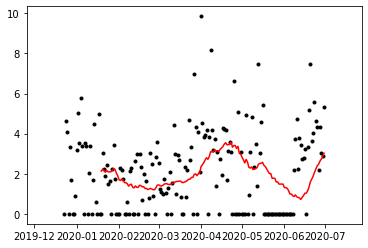

In [118]:
plt.scatter(time.index, time, marker='.', color='black')
plt.plot(rolling3, color='red')

In [16]:
reg = linear_model.LinearRegression()

In [17]:
reg.fit(df['total_hours'].values.reshape(-1, 1), df.d)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

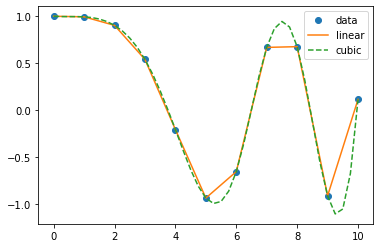

In [127]:
from scipy.interpolate import interp1d

x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')

xnew = np.linspace(0, 10, num=41, endpoint=True)
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

In [157]:
x = np.arange(0, len(time))

In [158]:
x

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

array([0.  , 4.64, 4.08, 0.  , 3.32, 1.71, 0.  , 0.  , 0.87, 3.17, 5.02,
       3.53, 5.8 , 3.39, 0.  , 3.55, 3.38, 0.  , 2.02, 3.37, 0.  , 1.69,
       4.46, 0.61, 0.  , 4.97, 0.  , 0.  , 3.03, 2.21, 1.9 , 2.42, 1.5 ,
       1.64, 0.  , 2.24, 3.44, 1.76, 0.  , 0.  , 0.  , 2.26, 2.19, 1.74,
       0.  , 0.  , 0.57, 0.  , 2.12, 2.27, 0.  , 0.  , 2.64, 2.97, 0.  ,
       3.  , 2.33, 0.69, 1.99, 0.  , 1.65, 0.  , 0.79, 3.05, 2.47, 0.88,
       0.  , 2.85, 3.6 , 2.51, 1.25, 1.08, 1.  , 1.74, 1.05, 0.  , 1.29,
       2.08, 0.  , 1.54, 4.42, 2.98, 1.01, 2.93, 2.67, 0.86, 0.  , 0.  ,
       2.31, 0.83, 2.18, 4.7 , 2.66, 3.33, 0.  , 6.99, 4.33, 0.  , 4.09,
       2.06, 9.85, 4.51, 3.81, 3.95, 4.16, 0.  , 3.84, 8.19, 4.18, 3.16,
       3.72, 1.4 , 3.06, 0.  , 2.73, 1.93, 4.26, 4.23, 4.16, 1.69, 3.13,
       3.56, 3.09, 0.  , 6.61, 0.  , 0.  , 5.06, 0.  , 3.08, 0.  , 0.  ,
       0.  , 4.93, 0.  , 0.95, 3.07, 4.85, 0.  , 2.32, 3.5 , 1.39, 7.45,
       3.02, 4.56, 5.45, 0.  , 0.  , 0.  , 0.  , 0.

In [174]:
test = interp1d(x, time.values)

In [170]:
xnew = np.arange(0, len(time), 1)

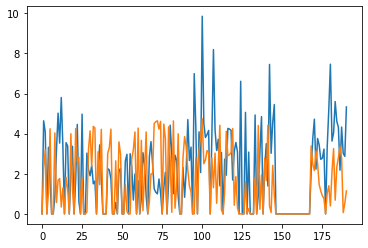

In [178]:
plt.plot(x, time)
plt.plot(x, test(time.values))